In [1]:
import random
import copy
import timeit
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

 - https://stackoverflow.com/questions/55255633/on-monte-carlo-probability-syntax
 

In [2]:
random.seed(123456)

In [3]:
n = 3
m = 4
p = 5

In [4]:
idx1 = [1]*n + [0]*(m*p-n)
def draw1(c, m, **kwargs):
    """
    Draw a random Monte Carlo Input: naïve version
    
      - Generate a random permutation of vector (1, ..., n, 0, ..., m*p - n)
      - Count number of women per table: reshape to matrix (p,m), then sum along table axis
      - Return the set of table indice where count > 0
    """
    x = np.random.permutation(c)
    x = np.array(x).reshape(m, -1).T
    return set(np.where(np.sum(x, axis=0)>0)[0])

In [5]:
def draw2(n, m, **kwargs):
    """
    Draw a random Monte Carlo Input: wrong version
    
      - Sample n times uniformally (with replacement) from set {0, ..., m-1}
      - Return sampled set
    """
    return set(random.randint(0, m-1) for _ in range(n))

In [6]:
setup = {
    'draw':{},
    'draw1': {
        'places': idx1,
        'function': draw1
    },
    'draw2': {
        'function': draw2
    }
}

In [7]:
def runMonteCarlo(N=100, n=3, m=4, p=5, function=None, places=None):
    """
    Run Monte Carlo Simulation:
    
    Problem statement:
      - m*p persons are mapped to m tables of capacity p;
      - There are exactly n women among the m*p humans;
      
    Assess, among others, the distribution of X (number of tables where no woman sit).
    
    Function parameters are:
    
      - N (int), number of Monte Carlo simulations;
      - n (int), number of women;
      - p (int), number of persons per table;
      - m (int), number of tables.
    
    Additional parameters:
    
      - func (function): to draw a random experiment for this Monte Carlo simulation
                         with function signature accepting (c, n, p, m) parameters.
                         Function must return a subset of table indices {0, m-1} where woman sit.
      - places (sequence): to represent sampled space (aliased as c).

    Function returns:
    
      - r (dict of (int, float)), experimental distribution of X;
      - E (float), the expectation of random variable X
      - f (float), probability of no woman sitting at table A.
    """
    
    def _draw(c, n, p, **kwargs):
        """
        Draw a random Monte Carlo Input for the given problem:
        
          - Draw n elements without replacement from the set {0, m*p-1} (select woman place indices)
          - Perform floor division of the n elements by p (assess table indices from place indices)
          - Returns a set of place indices where women sit.
        """
        return {x//p for x in random.sample(c, n)}
        
    # Initialization
    draw = function or _draw                # Select Monte Carlo Input function
    if places is None:
        places = list(range(m*p))           # Place indices: set {0, m*p-1}
    C = {k:0 for k in range(m+1)}           # Table without women Counter      
    f = 0                                   # Frequency of: There is no woman sitting at table A  
    
    # Generate Monte Carlo Inputs and assess Outputs
    for k in range(N):
        e = draw(c=places, n=n, m=m, p=p)   # Draw a random experiment
        x = m - len(e)                      # Number of table without woman
        C[x] += 1                           # Update Counter for X distribution
        f += int(0 not in e)                # Is there no woman at table A (index 0)?
    
    # Aggregation & Rationalization of Ouptuts
    r = {k:v/N for (k,v) in C.items()}
    E = sum([k*v for (k,v) in r.items()])
    f /= N
    
    # Trick to bind results to timeit caller:
    globals().get('_result', []).append({'F': r, 'extra': {'E[X]': E, 'fA': f}})
    
    return r, E, f

In [8]:
runMonteCarlo()

({0: 0.0, 1: 0.43, 2: 0.54, 3: 0.03, 4: 0.0}, 1.6, 0.34)

df.to_pickle('mcws.pickle')

In [9]:
df = pd.read_pickle('mcws.pickle')
df.tail(15)

,0,1,2,3,4,E[X],fA,key,N,id,batch,elapsed
2235,0.0,0.37910,0.55795,0.06295,0.0,1.68385,0.42005,draw2,20000,15,2,2.409735
2236,0.0,0.37560,0.56485,0.05955,0.0,1.68395,0.41785,draw2,20000,16,2,2.409735
2237,0.0,0.36875,0.56840,0.06285,0.0,1.69410,0.42560,draw2,20000,17,2,2.409735
2238,0.0,0.37455,0.56180,0.06365,0.0,1.68910,0.42075,draw2,20000,18,3,2.360457
2239,0.0,0.37755,0.56080,0.06165,0.0,1.68410,0.41735,draw2,20000,19,3,2.360457
2240,0.0,0.38200,0.55635,0.06165,0.0,1.67965,0.41450,draw2,20000,20,3,2.360457
2241,0.0,0.37385,0.56360,0.06255,0.0,1.68870,0.42310,draw2,20000,21,3,2.360457
2242,0.0,0.37170,0.56525,0.06305,0.0,1.69135,0.42435,draw2,20000,22,3,2.360457
2243,0.0,0.37070,0.56485,0.06445,0.0,1.69375,0.42415,draw2,20000,23,3,2.360457
2244,0.0,0.37820,0.56070,0.06110,0.0,1.68290,0.42000,draw2,20000,24,4,2.389123


In [10]:
df2 = df.groupby(['N', 'key']).mean().drop(['id', 'batch'], axis=1).unstack().sort_index(axis=1)
df2.tail()

0                     1                             2            \
key   draw draw1 draw2      draw     draw1     draw2      draw     draw1   
N                                                                          
16683  0.0   0.0   0.0  0.437415  0.438852  0.374365  0.528057  0.525989   
17512  0.0   0.0   0.0  0.439341  0.438058  0.374393  0.525617  0.526943   
18341  0.0   0.0   0.0  0.438449  0.438010  0.375550  0.526425  0.526522   
19170  0.0   0.0   0.0  0.438738  0.439400  0.374577  0.526215  0.525785   
20000  0.0   0.0   0.0  0.438502  0.437240  0.375148  0.526465  0.528047   

                        3  ...     4      E[X]                            fA  \
key       draw2      draw  ... draw2      draw     draw1     draw2      draw   
N                          ...                                                 
16683  0.562926  0.034528  ...   0.0  1.597113  1.596308  1.688343  0.399123   
17512  0.562942  0.035043  ...   0.0  1.595702  1.596941  1.688273  0.398479   
18341  0.561827  0.035125  ...   0.0  1.596676  1.597459  1.687073  0.399515   
19170  0.562895  0.035048  ...   0.0  1.596310  1.595415  1.687952  0.399703   
20000  0.563105  0.035033  ...   0.0  1.596532  1.597473  1.686598  0.399425   

                            elapsed                       
key       draw1     draw2      draw      draw1     draw2  
N                                                         
16683  0.398426  0.421571  2.069561  10.144975  1.967586  
17512  0.398944  0.422133  2.173217  10.557191  2.055847  
18341  0.399200  0.421556  2.286824  11.177983  2.151752  
19170  0.398931  0.422238  2.369165  11.727082  2.260928  
20000  0.398250  0.420850  2.501450  12.231146  2.378576  

[5 rows x 24 columns]

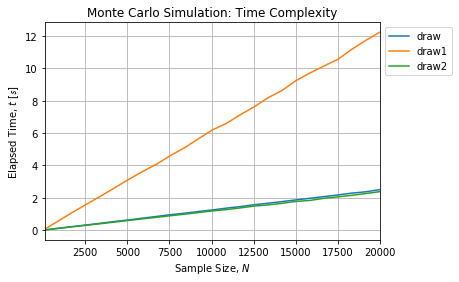

In [11]:
axe = df2['elapsed'].plot()
axe.set_title("Monte Carlo Simulation: Time Complexity")
axe.set_xlabel(r"Sample Size, $N$")
axe.set_ylabel(r"Elapsed Time, $t$ $[\mathcal{s}]$")
axe.legend(bbox_to_anchor=(1,1), loc='upper left')
axe.grid()

In [12]:
ref = [0, 500/1140, 600/1140, 40/1140, 0]
err = [0, 24/64, 36/64, 4/64, 0]

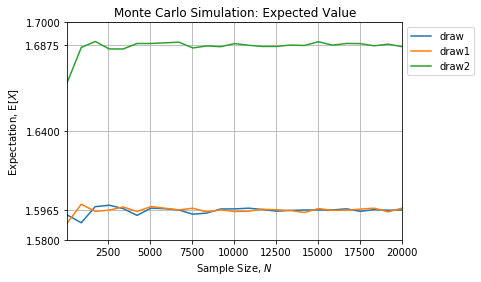

In [13]:
axe = df2['E[X]'].plot()
#axe.axhline(91/57, label=r'$E[X] = %.4f$' % (91/57), linestyle=':', color='k')
#axe.set_ylim([1.5, 1.8])
axe.set_title("Monte Carlo Simulation: Expected Value")
axe.set_xlabel(r"Sample Size, $N$")
axe.set_ylabel(r"Expectation, $\mathrm{E}[X]$")
axe.set_yticks([1.58, 1.64, 1.70] + [91/57, 27/16])
axe.legend(bbox_to_anchor=(1,1), loc='upper left')
axe.grid()

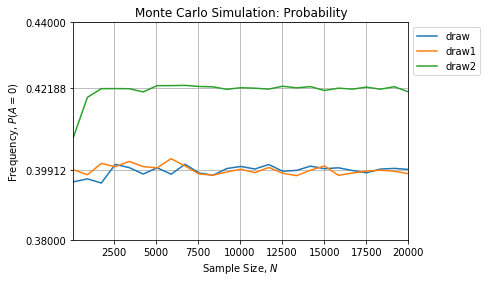

In [14]:
axe = df2['fA'].plot()
#axe.axhline(91/228, label=r'$P(A=0) = %.4f$' % (91/228), linestyle=':', color='k')
axe.set_title("Monte Carlo Simulation: Probability")
axe.set_xlabel(r"Sample Size, $N$")
axe.set_ylabel(r"Frequency, $P(A=0)$")
axe.set_yticks([0.38, 0.44] + [91/228, 27/64])
axe.legend(bbox_to_anchor=(1,1), loc='upper left')
axe.grid()

In [15]:
data = df.groupby(['N', 'key']).mean()
label = data.index.levels[0][-1]
data = data.loc[label,:].loc[:,[0,1,2,3,4]].T

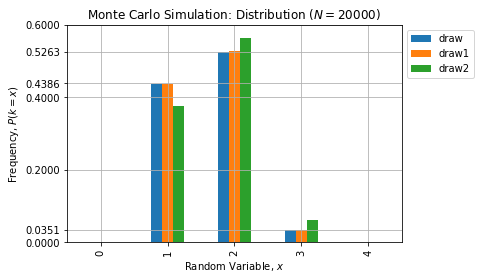

In [16]:
axe = data.plot(kind='bar')
axe.set_title(r"Monte Carlo Simulation: Distribution ($N=%d$)" % label)
axe.set_xlabel(r"Random Variable, $x$")
axe.set_ylabel(r"Frequency, $P(k=x)$")
axe.legend(bbox_to_anchor=(1,1), loc='upper left')
#axe.set_yticks(list(axe.get_yticks()) + ref[1:4])
axe.set_yticks([0,0.2,0.4,0.6] + ref[1:4])
axe.grid()

In [17]:
data['Reference'] = ref
data['Attempt'] = err
data

key,draw,draw1,draw2,Reference,Attempt
0,0.000000,0.000000,0.000000,0.000000,0.0000
1,0.438502,0.437240,0.375148,0.438596,0.3750
2,0.526465,0.528047,0.563105,0.526316,0.5625
3,0.035033,0.034713,0.061747,0.035088,0.0625
4,0.000000,0.000000,0.000000,0.000000,0.0000
